<a href="https://colab.research.google.com/github/rezaafsharniakan/Deep-learning-for-timeseries/blob/main/ANN_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ساخت شبکه عصبی از ابتدا

برای انجام عملیات گیت XOR یک شبکه عصبی دو لایه ساده می سازیم که در نمودار زیر نشان داده شده است. همانطور که می بینید، یک لایه ورودی با دو گره، یک لایه پنهان با پنج گره و یک لایه خروجی شامل یک گره داریم:

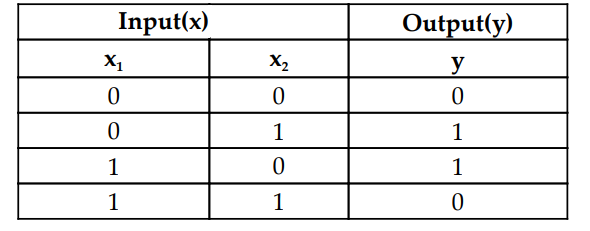

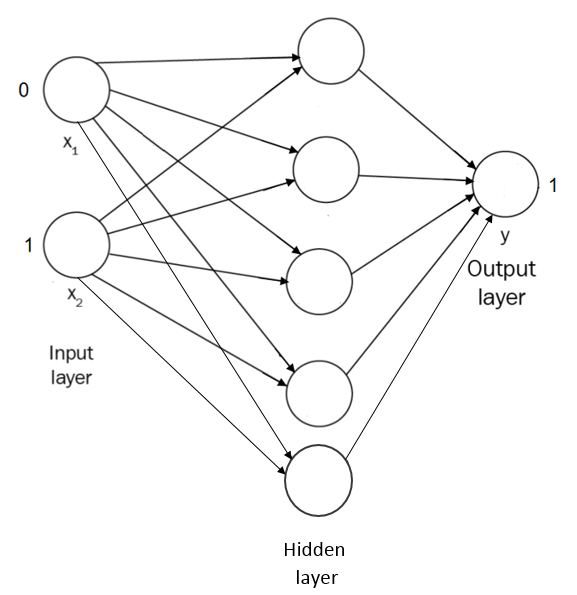

ما گام به گام خواهیم فهمید که چگونه یک شبکه عصبی منطق XOR را یاد می گیرد

داده ها را همانطور که در جدول XOR قبلی نشان داده شده است آماده کنید

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.array([ [0, 1], [1, 0], [1, 1],[0, 0] ])
y = np.array([ [1], [1], [0], [0]])
num_input = 2
num_hidden = 5
num_output = 1



وزن ها و بایاسها را به صورت تصادفی راه اندازی کنید. ابتدا، ورودی وزن لایه های پنهان را مقداردهی اولیه می کنیم:

In [3]:
Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

اکنون وزن لایه پنهان به خروجی را مقداردهی اولیه می کنیم:

In [4]:
Why = np.random.randn (num_hidden,num_output)
by = np.zeros((1,num_output))

تابع فعال سازی سیگموئید را تعریف کنید:

In [5]:
def sigmoid(z):
  return 1 / (1+np.exp(-z))

مشتق تابع سیگموئید را تعریف کنید:

In [6]:
def sigmoid_derivative(z):
  return np.exp(-z)/((1+np.exp(-z))**2)

انتشار رو به جلو را تعریف کنید:

In [7]:
def forward_prop(x,Wxh,Why):
  z1 = np.dot(x,Wxh) + bh
  a1 = sigmoid(z1)
  z2 = np.dot(a1,Why) + by
  y_hat = sigmoid(z2)
  return z1,a1,z2,y_hat

انتشار به عقب را تعریف کنید:



In [8]:
def backword_prop(y_hat, z1, a1, z2):
  delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
  dJ_dWhy = np.dot(a1.T, delta2)
  delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
  dJ_dWxh = np.dot(x.T, delta1)
  return dJ_dWxh, dJ_dWhy

تابع هزینه را تعریف کنید:

In [9]:
def cost_function(y, y_hat):
  J = 0.5*sum((y-y_hat)**2)
  return J

میزان یادگیری و تعداد تکرارهای آموزشی را تنظیم کنید

In [19]:
alpha = 0.01
num_iterations = 50000

حالا بیایید آموزش شبکه را با کد زیر شروع کنیم:

In [20]:
cost =[]
for i in range(num_iterations):
  z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)
  dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)
  #update weights
  Wxh = Wxh -alpha * dJ_dWxh
  Why = Why -alpha * dJ_dWhy
  #compute cost
  c = cost_function(y, y_hat)
  cost.append(c)

تابع هزینه را رسم کنید:

Text(0, 0.5, 'Cost')

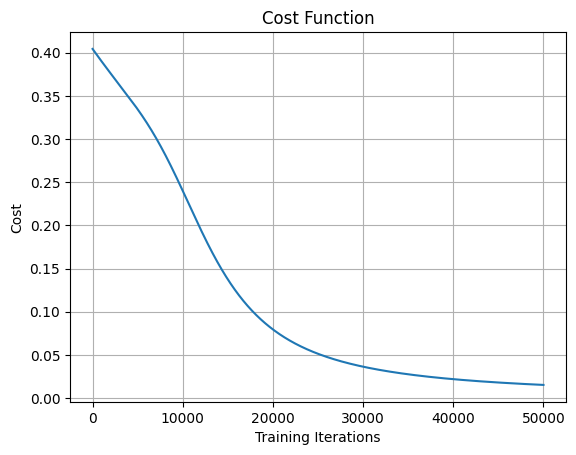

In [21]:
plt.grid()
plt.plot(range(num_iterations),cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

In [22]:
def predict(x):
  zp1 = np.dot(x,Wxh) + bh
  ap1 = sigmoid(zp1)
  zp2 = np.dot(ap1,Why) + by
  y_p = sigmoid(zp2)
  return y_p


In [24]:
x_t = np.array([ [0, 1] ])
print(predict(x_t))

[[0.90962219]]
